<a href="https://colab.research.google.com/github/sxnjith/Car-prediction-analysis/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df["Present_Price"].describe()

count    301.000000
mean       7.628472
std        8.642584
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

<Axes: ylabel='Frequency'>

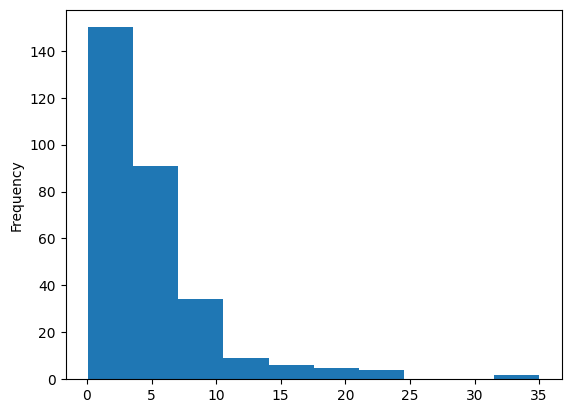

In [9]:
df["Selling_Price"].plot.hist()

<Axes: ylabel='Selling_Price'>

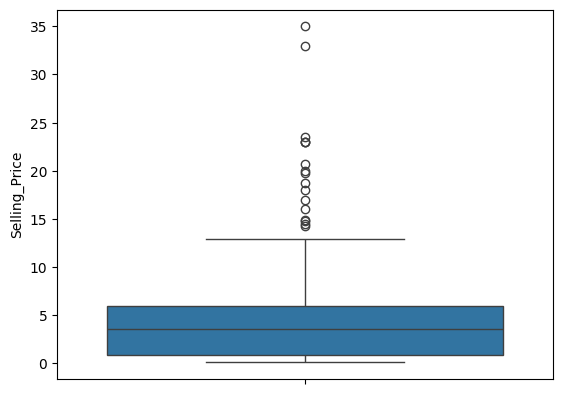

In [10]:
sb.boxplot(df["Selling_Price"])

In [13]:
q1 = df["Present_Price"].quantile(0.25)
q3 = df["Selling_Price"].quantile(0.75)
iqr = q3 - q1
iqr
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr
upper_lim,lower_lim

(13.2, -5.999999999999999)

In [14]:
def imputer(x):
    if x>upper_lim:
        return upper_lim
    elif x<lower_lim:
        return lower_lim
    else:
        return x


In [15]:
df["Present_Price"] = df["Present_Price"].apply(imputer)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
x = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]

In [18]:
categorical=x.select_dtypes(include="object")

Dummy encoding

In [19]:
dummy =pd.get_dummies(categorical,drop_first=True)
x =x.drop(categorical,axis=1)
x = pd.concat([x,dummy],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error
dt.score(x_test,predictions)

1.0